In [3]:
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
# generate data
x, y = samples_generator.make_classification(n_samples = 150,
                                           n_features = 25, n_classes = 3,
                                           n_informative = 6, n_redundant = 0,
                                           random_state = 7)

In [6]:
# select top k feature
k_best_selector = SelectKBest(f_regression, k = 9)


In [7]:
# initialize Extremely random forest classifier
classifier = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)


In [9]:
# construct the pipeline 
process_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

In [11]:
# set the parameters
process_pipeline.set_params(selector__k = 7, erf__n_estimators = 30)
process_pipeline.fit(x,y)

/home/odemakinde/cd/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=7, score_func=<function f_regression at 0x7f1411393e18>)), ('erf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=N...timators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [14]:
# predict outputs for the input data
output = process_pipeline.predict(x)
print('predicted output: ', output)

# print scores
print('score: ', process_pipeline.score(x, y))

predicted output:  [0 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 1 0 2 1 0 2 2 0 0 1 1 1 2 2 0 2 2 1
 1 2 2 2 0 1 0 2 1 1 2 1 0 1 2 2 1 2 0 2 2 0 2 2 0 1 0 2 1 1 1 1 2 0 1 0 2
 0 0 1 0 2 0 0 1 2 2 0 0 0 0 2 2 2 1 2 0 2 0 2 2 0 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 1 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 2 0 0 1 2 0
 2 2]
score:  0.9133333333333333


/home/odemakinde/cd/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [15]:
x.shape, y.shape

((150, 25), (150,))

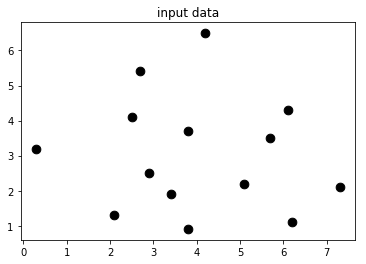

In [22]:
# Extracting the Nearest Neighbor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# input dta
x = np.array([[2.1,1.3],[.3,3.2],[2.9,2.5],[2.7,5.4],[3.8,0.9],
             [7.3,2.1],[4.2,6.5],[3.8,3.7],[2.5,4.1],[3.4,1.9],
             [5.7,3.5],[6.1,4.3],[5.1,2.2],[6.2,1.1]])
# Number of nearest neighbors
k = 5

# test datapoint
test_datapoint = [4.3,2.7]

# plot input data
plt.figure()
plt.title('input data')
plt.scatter(x[:,0], x[:,1], marker = 'o', s = 75, color = 'black')
plt.show()

In [24]:
# build k nearest neighbor model
knn_model = NearestNeighbors(n_neighbors =k, algorithm = 'ball_tree').fit(x)
distance, indices = knn_model.kneighbors(np.array(test_datapoint).reshape(1,-1))

In [25]:
# print the 'k' nearest neighbors
print('k nearest neighbors: ')
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + " ==>", x[index])

k nearest neighbors: 
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


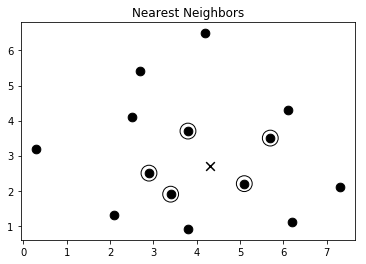

In [27]:
# visualizing the nearest neighbors

plt.figure()
plt.title("Nearest Neighbors")
plt.scatter(x[:,0], x[:,1], marker = 'o', s = 75, color = 'k')
plt.scatter(x[indices][0][:][:,0], x[indices][0][:][:,1],
                                    marker = 'o', s = 250, color = 'k',
                                    facecolors ='none')
plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', s = 75,
           color = 'k')
plt.show()

In [28]:
# building a k nearest neighbor classfier

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets